In [60]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
# from tensorflow.keras.optimizers.legacy import Adam

from matplotlib import pyplot as plt
import numpy as np

- Cercare come si crea un dataset di tipo .npz

In [61]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data(path="mnist.npz")



In [62]:
print(f"shape: {train_images.shape} ## type: {type(train_images)}")
print(f"shape: {train_labels.shape} ## type: {type(train_labels)}")

shape: (60000, 28, 28) ## type: <class 'numpy.ndarray'>
shape: (60000,) ## type: <class 'numpy.ndarray'>


- Verificare come funziona imshow su un array di dati...

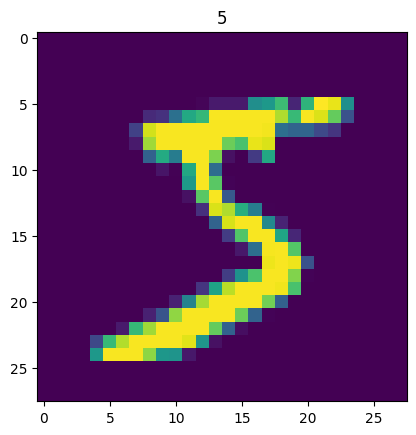

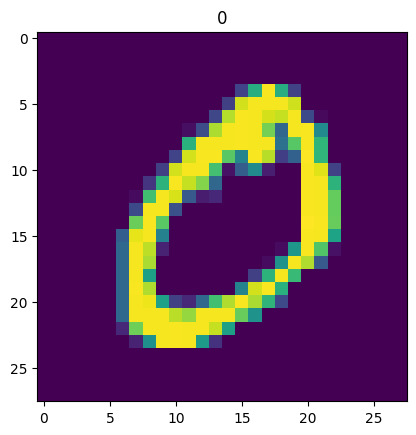

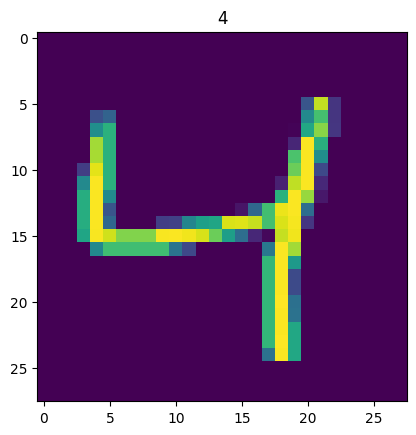

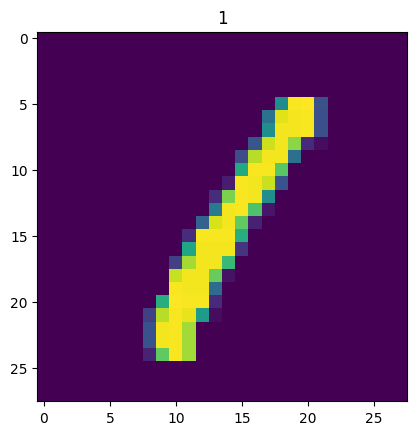

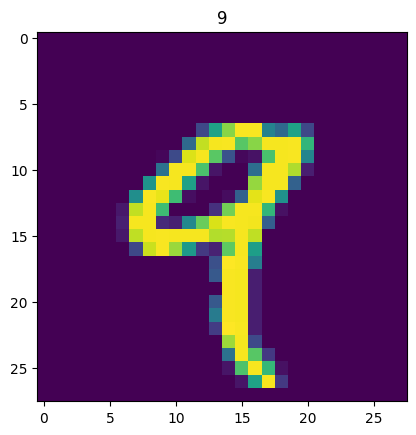

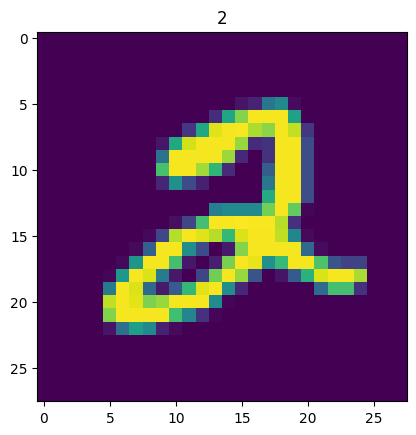

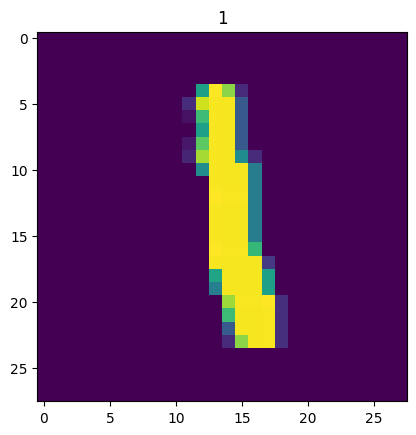

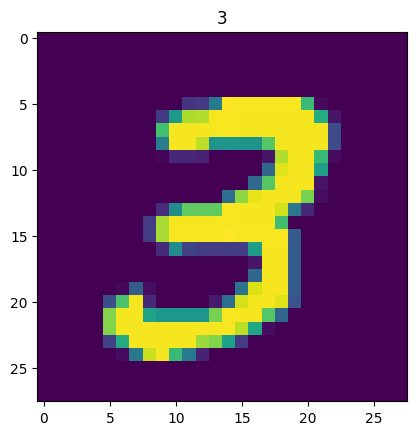

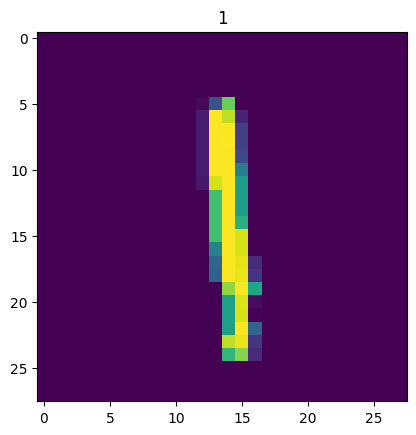

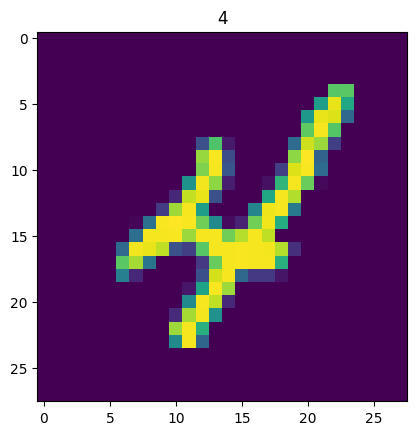

In [63]:
# stampa le prime 10 immagini
for i in range(10):
    plt.imshow(train_images[i])
    plt.title(train_labels[i])
    plt.show()

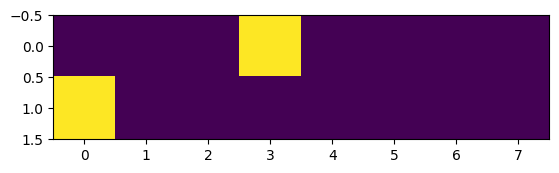

In [64]:
# Esempio per capire meglio imshow
array2dim = np.array([[0, 0, 0, 1, 0, 0, 0, 0],[1, 0, 0, 0, 0, 0, 0, 0]])
plt.imshow(array2dim)
plt.show()


In [65]:
# Preprocessing

# normalizzazione
train_images_normalized = train_images / 255
test_images_normalized = test_images / 255

In [66]:
# Appiattamenento di ogni immagine da un array 28 x 28 a una singola dimenrione pari a 784 pixel (28*28)
# questo perchè la rete neurale può prendere in input solamente un dato e non una matrice di dati ...
# parametri:
# -1 : Prende tutti i valori della prima colonna cosi come sono
# 784 : concatena tutti i singoli array da 28 feautures uno dopo l'altro delle due colonne rimanenti del nd.array
train_images_normalized = train_images_normalized.reshape((-1, 28*28))
test_images_normalized = test_images_normalized.reshape((-1, 784))

In [67]:
print(train_images_normalized.shape)
print(test_images_normalized.shape)

(60000, 784)
(10000, 784)


In [68]:
# Esempio per capire meglio reshape
# print(train_images[42])
# print(train_images.shape)

array3dim = np.array([
    [
        [11, 10, 9, 8],
        [7, 6, 5, 4], 
        [3, 2, 1, 0]
     ],
    [
        [0, 1, 2, 3],
        [4, 5, 6, 7], 
        [8, 9, 10, 11]
     ]
    ])

print(array3dim)
print(array3dim.shape)

# Trasforma/Riduci questo array a (2, 12)
new_array = array3dim.reshape((-1, 3*4))

print(new_array)
print(new_array.shape)

[[[11 10  9  8]
  [ 7  6  5  4]
  [ 3  2  1  0]]

 [[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]]
(2, 3, 4)
[[11 10  9  8  7  6  5  4  3  2  1  0]
 [ 0  1  2  3  4  5  6  7  8  9 10 11]]
(2, 12)


In [69]:
# trasformazione delle labels in one-hot encoding
# avendo valori da 0 .. 9 (possibili output delle rete neurale) trasformo gli interi da 0 a 9 in una sequenza di 0 e 1 
# dove il loro indice mi darà il valore corrispondente
# es. intero 5 = [0. 0. 0. 0. 0. 1. 0. 0. 0. 0]
train_labels_encoded = to_categorical(train_labels)
test_labels_encoded = to_categorical(test_labels)

# esempio di codifica one-hot encoding su un esempio di addestramento:
print(train_labels_encoded[30])


[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [75]:
# creazione del modello
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(784,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))


In [76]:
# compilazione del modello
model.compile(
    optimizer=Adam(learning_rate=0.005),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [77]:
# riepilogo del modello compilato
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 64)                50240     
                                                                 
 dense_14 (Dense)            (None, 64)                4160      
                                                                 
 dense_15 (Dense)            (None, 10)                650       
                                                                 
Total params: 55050 (215.04 KB)
Trainable params: 55050 (215.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [82]:
# addestramento del modello
history = model.fit(
    x=train_images_normalized,
    y=train_labels_encoded,
    epochs=10,
    batch_size=250,
    validation_data=(
        test_images_normalized,
        test_labels_encoded
    )
)

Epoch 1/10
240/240 [==============================] - 2s 8ms/step - loss: 61.0010 - accuracy: 0.8194 - val_loss: 51.5820 - val_accuracy: 0.8581
Epoch 2/10
240/240 [==============================] - 2s 7ms/step - loss: 64.2593 - accuracy: 0.8201 - val_loss: 48.3579 - val_accuracy: 0.8449
Epoch 3/10
240/240 [==============================] - 2s 8ms/step - loss: 68.5371 - accuracy: 0.8217 - val_loss: 64.5840 - val_accuracy: 0.8207
Epoch 4/10
240/240 [==============================] - 2s 8ms/step - loss: 72.1436 - accuracy: 0.8162 - val_loss: 59.1157 - val_accuracy: 0.8277
Epoch 5/10
240/240 [==============================] - 2s 8ms/step - loss: 65.5576 - accuracy: 0.8257 - val_loss: 59.5090 - val_accuracy: 0.8401
Epoch 6/10
240/240 [==============================] - 2s 7ms/step - loss: 64.9606 - accuracy: 0.8286 - val_loss: 59.2706 - val_accuracy: 0.8520
Epoch 7/10
240/240 [==============================] - 2s 7ms/step - loss: 65.8296 - accuracy: 0.8298 - val_loss: 92.9859 - val_accuracy:

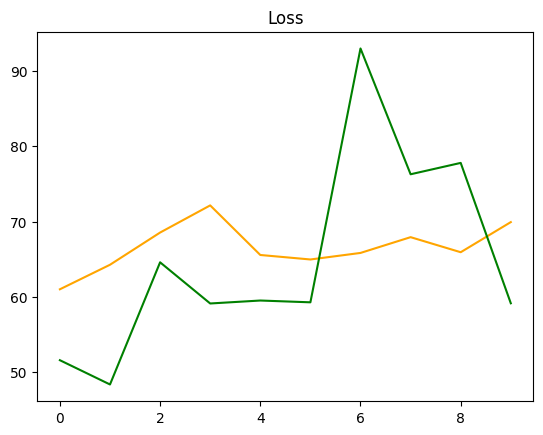

In [83]:
# visuallizzazione su grafico

# errore del modello
plt.plot(history.history['loss'], color='orange')
plt.plot(history.history['val_loss'], color='green')
plt.title("Loss")
plt.show()


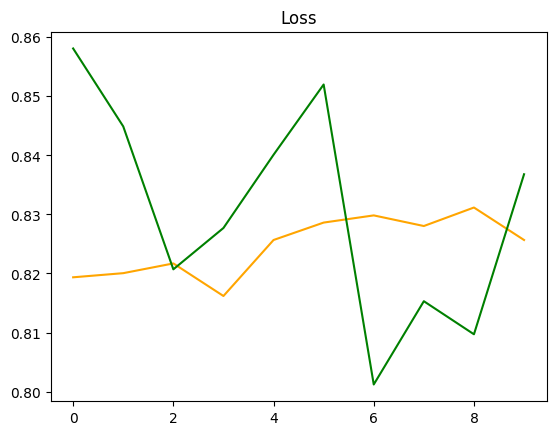

In [84]:
# accuratezza del modello
plt.plot(history.history['accuracy'], color='orange')
plt.plot(history.history['val_accuracy'], color='green')
plt.title("Loss")
plt.show()